In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService

MY_TOKEN = '5d00a533cc46cc02eca65a5aa42cf20809da6d1d4cf9120d40131979ea9daaca37d51499493382e5b5ee5c56bae06bcc4b2c31b3e52e17f4abd3f7e7ac1412cd'
service = QiskitRuntimeService(channel='ibm_quantum', instance='ibm-q/open/main', token=MY_TOKEN)

In [2]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>]

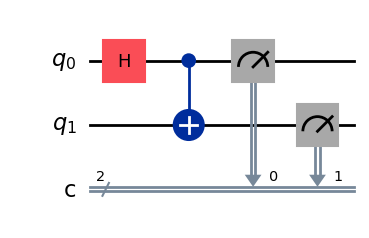

In [3]:
# get backend
backend = service.get_backend('ibm_brisbane')

# create a bell circuit
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])
circuit.draw('mpl')

In [4]:
# transpile to backend
circ = transpile(circuit, backend=backend)

In [5]:

# create a simulator for backend
sim = AerSimulator().from_backend(backend)

# simulate and extract results
simulator_result = sim.run(circ).result()
simulator_counts = simulator_result.get_counts()
simulator_counts

{'01': 27, '10': 21, '00': 482, '11': 494}

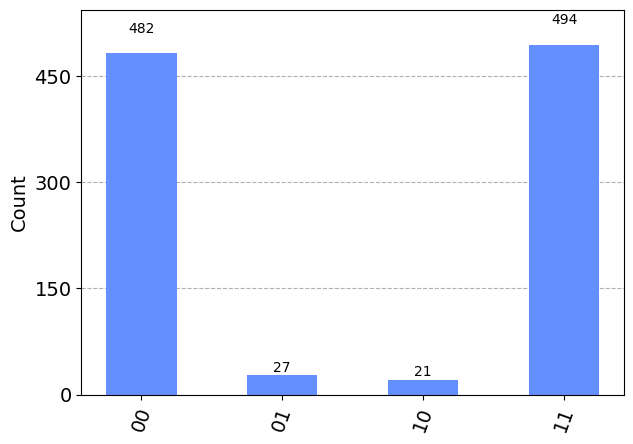

In [6]:
from qiskit.visualization import plot_histogram
plot_histogram(simulator_counts)

In [7]:
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

In [8]:
# Create an empty noise model
noise_model = NoiseModel.from_backend(backend)
 
# Add depolarizing error to all single qubit u1, u2, u3 gates
error = depolarizing_error(0.05, 1)
noise_model.add_all_qubit_quantum_error(error, ['u1', 'u2', 'u3'])

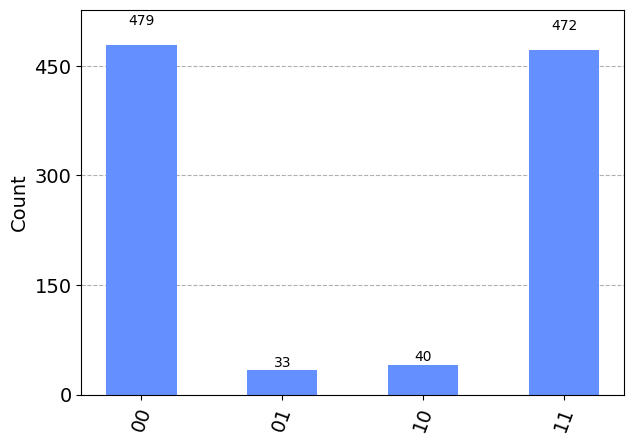

In [9]:
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_model)

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_noise)
circ_tnoise = passmanager.run(circuit)
 
# Run and get counts
result_noise = sim_noise.run(circ_tnoise).result()
counts_noise = result_noise.get_counts(0)
 
# Plot noisy output
plot_histogram(counts_noise)

## WITHOUT NOISY BACKEND

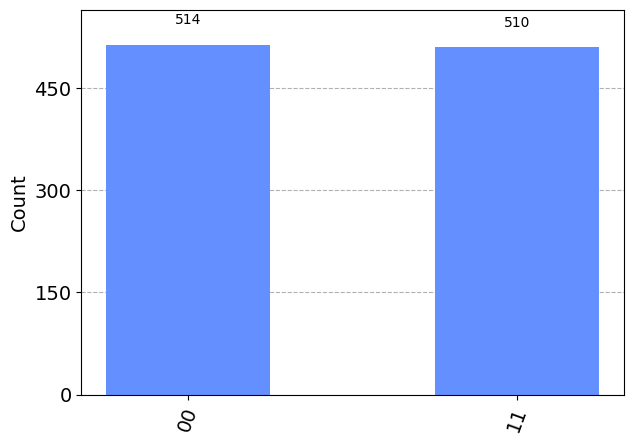

In [11]:
# create a simulator 
sim = AerSimulator()

# simulate and extract results
simulator_result = sim.run(circ).result()
simulator_counts = simulator_result.get_counts()
plot_histogram(simulator_counts)

In [23]:
# Create an empty noise model
noise_model = NoiseModel()
 
# Add depolarizing error to Hadamard (h) and CNOT (cx) gates
error_1qubit = depolarizing_error(0.0001, 1)  # 5% error on single-qubit gates
error_2qubit = depolarizing_error(0.01, 2)  # 5% error on two-qubit gates

# Apply the errors to Hadamard and CNOT gates
noise_model.add_all_qubit_quantum_error(error_1qubit, ['h'])   # For Hadamard
noise_model.add_all_qubit_quantum_error(error_2qubit, ['cx'])  # For CNOT
 
# Print noise model info
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['cx', 'h']
  All-qubits errors: ['h', 'cx']


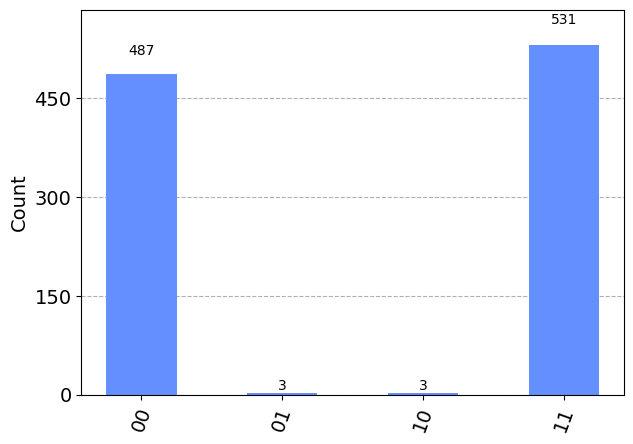

In [24]:
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_model)

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_noise)
circ_tnoise = passmanager.run(circuit)
 
# Run and get counts
result_noise = sim_noise.run(circ_tnoise).result()
counts_noise = result_noise.get_counts(0)
 
# Plot noisy output
plot_histogram(counts_noise)